In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import timeline_drawer
from datetime import datetime
import time
# transpile
from qiskit.transpiler import InstructionDurations, PassManager
from qiskit.transpiler.passes import DynamicalDecoupling, Unroller, ALAPSchedule, LookaheadSwap, BasicSwap
#RB
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils

#local로 안받으려고 바꿈.
from rb_experiment_dd import StandardRB_dd

from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate, CXGate, YGate,RZGate
#from qiskit_experiments.library.randomized_benchmarking.double_interleaved_rb_experiment import DoubleI

In [2]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='snu', project='snu-students')>]

In [3]:
#from qiskit import IBMQ
#IBMQ.save_account(token='1fa943879509be3fdff89e627f421e2db0f3dd381d3858e3fa173593ebd3d8a7ebe9be59de6f11f769897a25d32fcf3fe4cc0f3568d8565d9214773d6e1757b9', hub='ibm-q-skku', group='snu', project='snu-students', overwrite=True)
#provider=IBMQ.enable_account(<1fa943879509be3fdff89e627f421e2db0f3dd381d3858e3fa173593ebd3d8a7ebe9be59de6f11f769897a25d32fcf3fe4cc0f3568d8565d9214773d6e1757b9>)

In [4]:
provider=IBMQ.providers()[2]
backend=provider.get_backend('ibmq_jakarta')
properties=backend.properties()


#provider=IBMQ.providers()[2]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
#backend = provider.get_backend('ibmq_lima')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_jakarta is on version 1.0.34. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]] are the list of connected qubits.ibmq_jakarta can handle maximum 300 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


여기 이후에는 target, control 각각 하도록 코드 수정함.

ibmq_jakarta
2022-06-28 13:19:27.437423
This is done by MyDynamicalDecoupling
near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 1)
recent_cx_qargs
[Qubi

recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
n

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(Quantu

recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
n

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 2)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 1)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 1)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(QuantumRegister(7, 'q'), 1)
Qubit(QuantumRegister(7, 'q'), 0)
near?
False
True
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 0)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(Quantu

False
Now!
Qubit(QuantumRegister(7, 'q'), 4)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 5)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 6)
near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 1)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), 

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 1)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(Quantu

near?
False
False
Now!
Qubit(QuantumRegister(7, 'q'), 1)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 0)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1)]
Qubit(QuantumRegister(7, 'q'), 0)
Qubit(QuantumRegister(7, 'q'), 1)
near?
True
False
Now!
Qubit(QuantumRegister(7, 'q'), 2)
recent_cx_qargs
[Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2)]
Qubit(Quantu

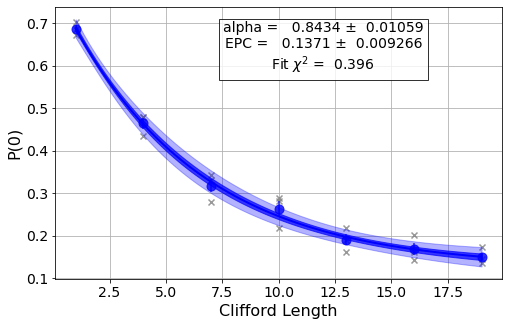

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6675900251954897, 0.8433593589969426, 0.1240725655912766]
- χ²: 0.39600977330730974
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.843+/-0.011
- χ²: 0.39600977330730974
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.137+/-0.009
- χ²: 0.39600977330730974
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


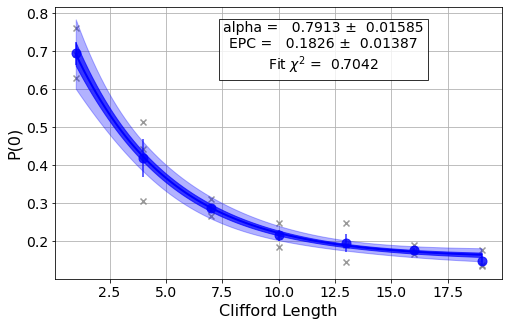

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6768672644597178, 0.7912911349240604, 0.15631456929911794]
- χ²: 0.7042342259286839
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.791+/-0.016
- χ²: 0.7042342259286839
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.183+/-0.014
- χ²: 0.7042342259286839
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [5]:
from math import pi

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence_target=[XGate(),XGate()],dd_sequence_control=[XGate(),SXGate(),SXGate(),RZGate(pi),XGate(),SXGate(),SXGate(),RZGate(pi)])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

디버깅으로 완성 후 돌린 것

ibmq_jakarta
2022-06-28 14:12:41.749862


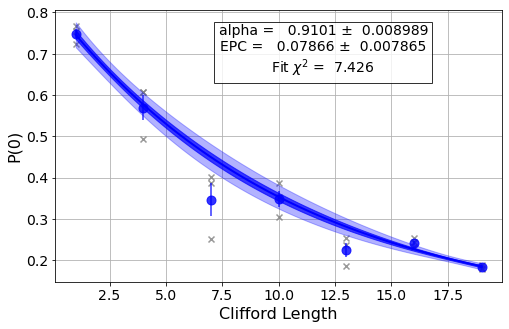

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.7541376818768155, 0.9101028562495975, 0.059212022642763665]
- χ²: 7.426197773438163
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.910+/-0.009
- χ²: 7.426197773438163
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.079+/-0.008
- χ²: 7.426197773438163
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


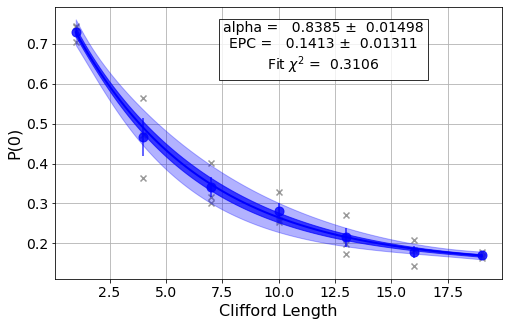

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6966235321403307, 0.8384963246841116, 0.14506619125479359]
- χ²: 0.31059793508114125
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.838+/-0.015
- χ²: 0.31059793508114125
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.141+/-0.013
- χ²: 0.31059793508114125
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [5]:
from math import pi

backend=provider.get_backend('ibmq_jakarta')

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence_target=[XGate(),XGate()],dd_sequence_control=[XGate(),SXGate(),SXGate(),RZGate(pi),XGate(),SXGate(),SXGate(),RZGate(pi)])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-28 14:43:30.492782


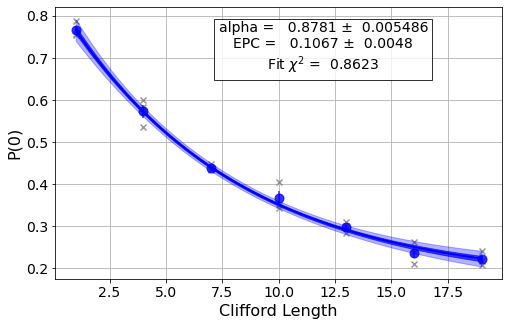

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6836868478266261, 0.8780566808375623, 0.16551835436985765]
- χ²: 0.8623443544728381
- quality: good
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.878+/-0.005
- χ²: 0.8623443544728381
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.107+/-0.005
- χ²: 0.8623443544728381
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


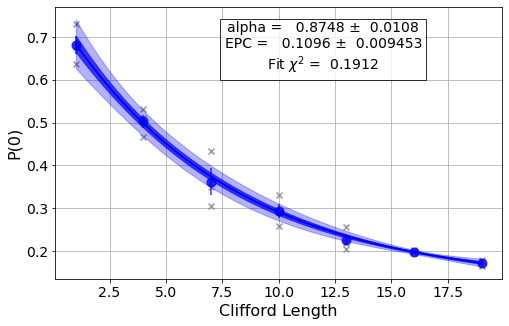

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6417571508533622, 0.8747556447669974, 0.12254338258815455]
- χ²: 0.19116017284531733
- quality: good
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.875+/-0.011
- χ²: 0.19116017284531733
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.110+/-0.009
- χ²: 0.19116017284531733
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


In [6]:
from math import pi

backend=provider.get_backend('ibmq_jakarta')

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,3,5]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence_target=[XGate(),XGate()],dd_sequence_control=[XGate(),SXGate(),SXGate(),RZGate(pi),XGate(),SXGate(),SXGate(),RZGate(pi)])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-28 14:48:20.563068


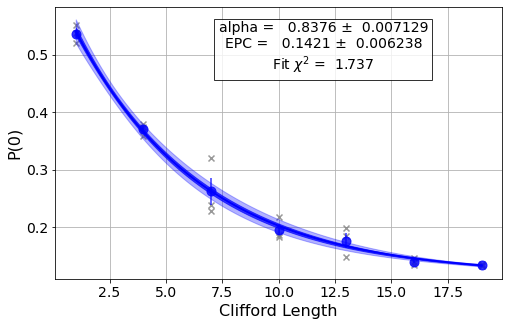

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5062313160705938, 0.8376448998082734, 0.11640802239492096]
- χ²: 1.7366443925338064
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.838+/-0.007
- χ²: 1.7366443925338064
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.142+/-0.006
- χ²: 1.7366443925338064
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


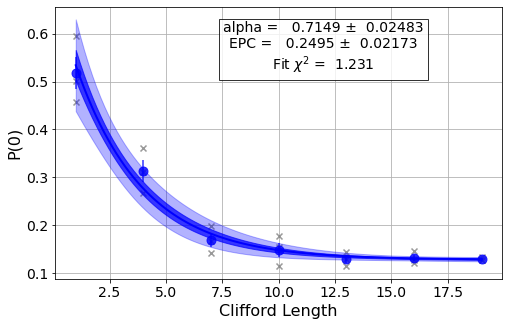

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5674496917703233, 0.7148770203351282, 0.12834812363409945]
- χ²: 1.2310597978940254
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.715+/-0.025
- χ²: 1.2310597978940254
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.249+/-0.022
- χ²: 1.2310597978940254
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


In [7]:
from math import pi

backend=provider.get_backend('ibmq_jakarta')

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [4,5,6]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence_target=[XGate(),XGate()],dd_sequence_control=[XGate(),SXGate(),SXGate(),RZGate(pi),XGate(),SXGate(),SXGate(),RZGate(pi)])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)